In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import RobustScaler,LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [36]:
df = pd.read_csv('/content/train.csv')
df.shape

(84960, 17)

In [37]:
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,1,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,2,1,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,3,1,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,4,1,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,5,1,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


In [38]:
df.tail()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
84955,84956,8,12,31,Solstice,25.479998,-36.329990,25.60,28.60,3.4,3.5,19.41,0.13,1,14.8,90,1.562346
84956,84957,8,12,31,Sunspear,26.580005,-37.530000,25.80,28.90,2.8,3.7,20.98,0.26,2,16.3,91,1.607436
84957,84958,8,12,31,Utopia,23.979999,-37.630006,298.75,301.65,7.6,9.2,22.67,0.00,0,12.6,71,1.710188
84958,84959,8,12,31,Valyria,24.280002,-35.729980,25.60,28.10,4.0,3.8,19.72,0.00,0,16.3,54,1.613430
84959,84960,8,12,31,Winterfell,23.979999,-36.429994,20.10,21.50,8.4,11.1,21.31,0.00,0,9.4,53,1.539015


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84960 entries, 0 to 84959
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            84960 non-null  int64  
 1   Year                          84960 non-null  int64  
 2   Month                         84960 non-null  int64  
 3   Day                           84960 non-null  int64  
 4   kingdom                       84960 non-null  object 
 5   latitude                      84960 non-null  float64
 6   longitude                     84960 non-null  float64
 7   Avg_Temperature               84960 non-null  float64
 8   Avg_Feels_Like_Temperature    84960 non-null  float64
 9   Temperature_Range             84960 non-null  float64
 10  Feels_Like_Temperature_Range  84960 non-null  float64
 11  Radiation                     84960 non-null  float64
 12  Rain_Amount                   84960 non-null  float64
 13  R

In [40]:
df.isna().sum()

,0
ID,0
Year,0
Month,0
Day,0
kingdom,0
latitude,0
longitude,0
Avg_Temperature,0
Avg_Feels_Like_Temperature,0
Temperature_Range,0


In [41]:
df['Year'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,84960.0,42480.500000,24525.983772,1.000000,21240.750000,42480.500000,63720.250000,84960.000000
Year,84960.0,4.610876,2.239331,1.000000,3.000000,5.000000,7.000000,8.000000
Month,84960.0,6.666667,3.402793,1.000000,4.000000,7.000000,10.000000,12.000000
Day,84960.0,15.735876,8.802867,1.000000,8.000000,16.000000,23.000000,31.000000
latitude,84960.0,24.003334,0.798622,22.880000,23.680003,23.780002,24.280002,26.580005
longitude,84960.0,-37.266665,0.488873,-37.729980,-37.630006,-37.530000,-37.130006,-35.729980
Avg_Temperature,84960.0,135.600751,133.650417,18.600000,26.300000,28.100000,299.350000,303.650000
Avg_Feels_Like_Temperature,84960.0,139.735375,133.937168,18.700000,30.300000,32.500000,303.850000,309.650000
Temperature_Range,84960.0,5.345287,1.977739,0.500000,3.800000,5.100000,6.500000,15.400000
Feels_Like_Temperature_Range,84960.0,6.361224,2.371880,0.800000,4.500000,6.200000,8.000000,17.300000


In [43]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
  return outliers

In [44]:
outlier1 = find_outliers_IQR(df['Rain_Amount'])
print('no of outliers: '+str(len(outlier1)))
outlier1

no of outliers: 6564


,Rain_Amount
0,58.89
3,75.27
5,66.17
7,66.17
8,40.43
...,...
84777,26.39
84778,161.33
84779,188.50
84783,48.75


In [45]:
outliers_2=find_outliers_IQR(df['Wind_Direction'])
print("number of outliers: "+ str(len(outliers_2)))
outliers_2

number of outliers: 0


,Wind_Direction


In [46]:
Avg_wind = px.box(df,x='Wind_Direction')
Avg_wind.show()

In [47]:
Avg_Temperature = px.box(df,x='Rain_Amount')
Avg_Temperature.show()

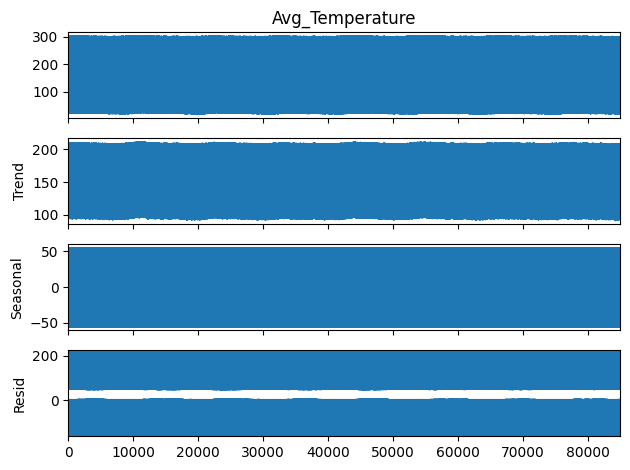

In [48]:
decomposition = seasonal_decompose(df['Avg_Temperature'], model='additive', period=12)

decomposition.plot()
plt.show()

In [49]:
df['Year'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [50]:
df['Year']=df['Year'].replace({1:2017,2:2018,3:2019,3:2020,4:2021,5:2022,6:2023,7:2024,8:2025})
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
0,1,2017,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
1,2,2017,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2,3,2017,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
3,4,2017,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
4,5,2017,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


In [51]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']],errors='coerce')
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Date
0,1,2017,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,2017-04-01
1,2,2017,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094,2017-04-01
2,3,2017,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309,2017-04-01
3,4,2017,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997,2017-04-01
4,5,2017,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189,2017-04-01


In [52]:
df.isnull().sum()

,0
ID,0
Year,0
Month,0
Day,0
kingdom,0
latitude,0
longitude,0
Avg_Temperature,0
Avg_Feels_Like_Temperature,0
Temperature_Range,0


In [53]:
df[df['Date'].isnull()].head(60)

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Date
10020,10021,2018,2,29,Arcadia,24.280002,-37.229980,28.20,31.20,10.0,9.8,23.49,1.43,2,18.0,101,1.871802,NaT
10021,10022,2018,2,29,Atlantis,22.979999,-37.329990,301.85,306.05,6.9,7.1,25.33,0.52,3,17.0,118,1.859418,NaT
10022,10023,2018,2,29,Avalon,22.880000,-37.130006,28.30,32.20,6.5,6.7,25.33,0.52,3,17.0,118,1.873339,NaT
10023,10024,2018,2,29,Camelot,24.180003,-36.929994,24.90,28.00,8.1,8.9,22.56,0.78,2,13.1,113,1.678964,NaT
10024,10025,2018,2,29,Dorne,25.780002,-37.530000,28.10,31.10,6.0,5.6,22.57,0.00,0,24.3,104,1.822935,NaT
10025,10026,2018,2,29,Eden,23.780002,-37.630006,28.50,34.00,9.3,11.1,25.03,4.16,3,7.7,104,1.791759,NaT
10026,10027,2018,2,29,El Dorado,23.680003,-37.229980,299.65,305.55,8.3,11.7,24.87,0.39,3,4.6,138,1.742219,NaT
10027,10028,2018,2,29,Elysium,23.780002,-37.630006,28.40,33.80,9.3,11.0,25.03,4.16,3,7.7,104,1.788421,NaT
10028,10029,2018,2,29,Emerald City,23.479999,-37.530000,300.95,306.75,6.7,9.0,25.06,3.77,4,8.6,252,1.761300,NaT
10029,10030,2018,2,29,Helios,24.380000,-37.130006,28.20,31.60,9.2,9.4,23.49,1.43,2,18.0,101,1.851599,NaT


In [54]:
df = df.drop(range(10030,10048))
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Date
0,1,2017,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,2017-04-01
1,2,2017,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094,2017-04-01
2,3,2017,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309,2017-04-01
3,4,2017,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997,2017-04-01
4,5,2017,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189,2017-04-01


In [55]:
df = df.drop(range(53850,53880))

In [56]:
df.isna().sum()

,0
ID,0
Year,0
Month,0
Day,0
kingdom,0
latitude,0
longitude,0
Avg_Temperature,0
Avg_Feels_Like_Temperature,0
Temperature_Range,0


In [57]:
df[df['Date'].isnull()].head(11)

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Date
10020,10021,2018,2,29,Arcadia,24.280002,-37.229980,28.20,31.20,10.0,9.8,23.49,1.43,2,18.0,101,1.871802,NaT
10021,10022,2018,2,29,Atlantis,22.979999,-37.329990,301.85,306.05,6.9,7.1,25.33,0.52,3,17.0,118,1.859418,NaT
10022,10023,2018,2,29,Avalon,22.880000,-37.130006,28.30,32.20,6.5,6.7,25.33,0.52,3,17.0,118,1.873339,NaT
10023,10024,2018,2,29,Camelot,24.180003,-36.929994,24.90,28.00,8.1,8.9,22.56,0.78,2,13.1,113,1.678964,NaT
10024,10025,2018,2,29,Dorne,25.780002,-37.530000,28.10,31.10,6.0,5.6,22.57,0.00,0,24.3,104,1.822935,NaT
10025,10026,2018,2,29,Eden,23.780002,-37.630006,28.50,34.00,9.3,11.1,25.03,4.16,3,7.7,104,1.791759,NaT
10026,10027,2018,2,29,El Dorado,23.680003,-37.229980,299.65,305.55,8.3,11.7,24.87,0.39,3,4.6,138,1.742219,NaT
10027,10028,2018,2,29,Elysium,23.780002,-37.630006,28.40,33.80,9.3,11.0,25.03,4.16,3,7.7,104,1.788421,NaT
10028,10029,2018,2,29,Emerald City,23.479999,-37.530000,300.95,306.75,6.7,9.0,25.06,3.77,4,8.6,252,1.761300,NaT
10029,10030,2018,2,29,Helios,24.380000,-37.130006,28.20,31.60,9.2,9.4,23.49,1.43,2,18.0,101,1.851599,NaT


In [58]:
df = df.drop(range(10021,10029))

In [59]:
df = df.drop(10020)

In [60]:
df = df.drop(10049)

In [61]:
df.isna().sum()

,0
ID,0
Year,0
Month,0
Day,0
kingdom,0
latitude,0
longitude,0
Avg_Temperature,0
Avg_Feels_Like_Temperature,0
Temperature_Range,0


In [62]:
df.set_index('Date',inplace=True)
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration
Date,,,,,,,,,,,,,,,,,
2017-04-01,1,2017,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659
2017-04-01,2,2017,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094
2017-04-01,3,2017,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309
2017-04-01,4,2017,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997
2017-04-01,5,2017,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189


In [63]:
df['kingdom'] = df['kingdom'].replace({'Arcadia', 'Atlantis', 'Avalon', 'Camelot', 'Dorne', 'Eden','El Dorado', 'Elysium', 'Emerald City', 'Helios', 'Krypton',
       'Metropolis', 'Midgar', 'Midgard', 'Mordor', 'Neo-City',
       'Neo-Tokyo', 'Nirvana', 'Olympus', 'Pandora', 'Rapture',
       'Rivendell', 'Serenity', 'Shangri-La', 'Solara', 'Solstice',
       'Sunspear', 'Utopia', 'Valyria', 'Winterfell'})

<ipython-input-63-7f7663ddf42d>:1: FutureWarning:

Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.



In [64]:
df['kingdom'].unique()

array(['Arcadia', 'Atlantis', 'Avalon', 'Camelot', 'Dorne', 'Eden',
       'El Dorado', 'Elysium', 'Emerald City', 'Helios', 'Krypton',
       'Metropolis', 'Midgar', 'Midgard', 'Mordor', 'Neo-City',
       'Neo-Tokyo', 'Nirvana', 'Olympus', 'Pandora', 'Rapture',
       'Rivendell', 'Serenity', 'Shangri-La', 'Solara', 'Solstice',
       'Sunspear', 'Utopia', 'Valyria', 'Winterfell'], dtype=object)

In [65]:
LabelEncoder = LabelEncoder()
df['Kingdom_Label'] = LabelEncoder.fit_transform(df['kingdom'])
print(df[['kingdom','Kingdom_Label']])

               kingdom  Kingdom_Label
Date                                 
2017-04-01     Arcadia              0
2017-04-01    Atlantis              1
2017-04-01      Avalon              2
2017-04-01     Camelot              3
2017-04-01       Dorne              4
...                ...            ...
2025-12-31    Solstice             25
2025-12-31    Sunspear             26
2025-12-31      Utopia             27
2025-12-31     Valyria             28
2025-12-31  Winterfell             29

[84902 rows x 2 columns]


In [66]:
df.head()

,ID,Year,Month,Day,kingdom,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Kingdom_Label
Date,,,,,,,,,,,,,,,,,,
2017-04-01,1,2017,4,1,Arcadia,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,0
2017-04-01,2,2017,4,1,Atlantis,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094,1
2017-04-01,3,2017,4,1,Avalon,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309,2
2017-04-01,4,2017,4,1,Camelot,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997,3
2017-04-01,5,2017,4,1,Dorne,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189,4


In [67]:
df_trasform_train = df.drop(['Year','Month','Day','kingdom','ID'],axis=1)
df_trasform_train.head()

,latitude,longitude,Avg_Temperature,Avg_Feels_Like_Temperature,Temperature_Range,Feels_Like_Temperature_Range,Radiation,Rain_Amount,Rain_Duration,Wind_Speed,Wind_Direction,Evapotranspiration,Kingdom_Label
Date,,,,,,,,,,,,,
2017-04-01,24.280002,-37.229980,25.50,30.50,8.5,10.3,22.52,58.89,16,8.6,283,1.648659,0
2017-04-01,22.979999,-37.329990,299.65,305.15,5.9,8.2,22.73,11.83,12,15.8,161,1.583094,1
2017-04-01,22.880000,-37.130006,26.30,31.50,5.2,6.4,22.73,11.83,12,15.8,161,1.593309,2
2017-04-01,24.180003,-36.929994,24.00,28.40,8.2,10.7,22.67,75.27,16,6.4,346,1.638997,3
2017-04-01,25.780002,-37.530000,28.00,32.80,5.7,10.2,22.35,4.81,8,16.7,185,1.719189,4


In [68]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_trasform_train)
scaled_data

array([[ 0.83333542,  0.60004   , -0.00952207, ...,  0.16766467,
         0.22510212, -0.96666667],
       [-1.33334167,  0.40002   ,  0.9945065 , ..., -0.56287425,
        -0.02326376, -0.9       ],
       [-1.50000625,  0.799988  , -0.0065922 , ..., -0.56287425,
         0.01543018, -0.83333333],
       ...,
       [ 0.33332917, -0.200012  ,  0.9912104 , ..., -1.10179641,
         0.45818111,  0.83333333],
       [ 0.83333542,  3.60004   , -0.00915583, ..., -1.20359281,
         0.09165216,  0.9       ],
       [ 0.33332917,  2.200012  , -0.02929866, ..., -1.20958084,
        -0.19023768,  0.96666667]])

In [69]:
input_cols = scaled_data
output_cols = df_trasform_train[['Avg_Temperature','Rain_Amount','Wind_Speed','Radiation','Wind_Direction']]

In [70]:
window_size = 7
X_train = []
y_train = []

for i in range(len(input_cols)-window_size):
  X_train.append(input_cols[i:i+window_size])
  y_train.append(output_cols.iloc[i+window_size])


X_train,y_train = np.array(X_train),np.array(y_train)

print("Input shape:",X_train.shape)
print("Output shape:",y_train.shape)


Input shape: (84895, 7, 13)
Output shape: (84895, 5)


In [71]:
train_size =int(0.8*len(X_train))
X_train_data = X_train[:train_size]
y_train_data = y_train[:train_size]
X_test_data = X_train[train_size:]
y_test_data = y_train[train_size:]

print("Train data size:", len(X_train_data))
print("Test data size:", len(X_test_data))


Train data size: 67916
Test data size: 16979


In [72]:
model = Sequential([
    LSTM(units=64,return_sequences=True,input_shape=(window_size,input_cols.shape[1])),
    LSTM(units=32),
    Dense(32,activation='relu'),
    Dense(len(output_cols.columns))
])

model.compile(optimizer='adam',loss='mse',metrics=["mae"])
summery = model.fit(X_train_data,y_train_data,epochs=50,batch_size=16,validation_data=(X_test_data,y_test_data))





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - loss: 6312.6060 - mae: 42.4167 - val_loss: 620.7701 - val_mae: 11.1271
Epoch 2/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 510.8838 - mae: 9.6047 - val_loss: 548.7186 - val_mae: 10.0849
Epoch 3/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 396.8951 - mae: 8.1841 - val_loss: 499.9007 - val_mae: 9.4889
Epoch 4/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - loss: 336.6075 - mae: 7.3738 - val_loss: 481.3030 - val_mae: 9.2321
Epoch 5/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 327.8539 - mae: 7.0956 - val_loss: 471.1282 - val_mae: 9.0437
Epoch 6/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 304.4762 - mae: 6.7796 - val_loss: 466.9940 - val_mae: 8.8477
Epoch 7/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - loss: 292.1248 - mae: 6.5521 - val_loss: 439.4362 - val_mae: 8.5983
Epoch 8/50
4245/4245 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 277.1920 - mae: 6.3414 - val_loss: 444.3942 - val_mae: 8.5

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = model.predict(X_test_data)
mse = mean_squared_error(y_test_data,y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test_data,y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)


531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
MSE: 437.63674697246944
RMSE: 20.919769285832707
MAE: 7.143561928766614


In [88]:
cities = df['kingdom'].unique()
num_days_to_predict = 365
window_size = 7


predictions_dict = {}

for city in cities:
    print(f"Predicting for city: {city}")


    city_data = df[df['kingdom'] == city].copy()

    city_data_transformed = city_data[['latitude','longitude','Avg_Temperature','Avg_Feels_Like_Temperature','Temperature_Range','Feels_Like_Temperature_Range','Radiation','Rain_Amount','Rain_Duration','Wind_Speed','Wind_Direction','Evapotranspiration','Kingdom_Label']]

    # Ensure city_data_transformed has the same columns and order as df_transform_train
    city_data_transformed = city_data_transformed[df_trasform_train.columns]

    scaled_city_data = scaler.transform(city_data_transformed)
    last_known_data = scaled_city_data[-window_size:]
    future_input = np.array(last_known_data).reshape(1, window_size,scaled_city_data.shape[1])

    city_predictions = []

    for _ in range(num_days_to_predict):

        next_pred = model.predict(future_input)


        city_predictions.append(next_pred[0])

        # Get the indices of the relevant columns based on output_cols
        relevant_features_indices = [city_data_transformed.columns.get_loc(col) for col in output_cols.columns]

        # Use those indices to extract the relevant features from next_pred[0]
        relevant_features = next_pred[0][relevant_features_indices]

        relevant_features = relevant_features.reshape(1, 1, len(relevant_features_indices))

        future_input = np.append(future_input[:, 1:, :], [[next_pred[0]]], axis=1)


    predictions_dict[city] = np.array(city_predictions)

print("Prediction completed for all cities!")


Predicting for city: Arcadia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


IndexError: index 7 is out of bounds for axis 0 with size 5